In [2]:
# Performing PCA on the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('mod_train.csv')
dataset.head()

,image_id,image_category,aspect_ratio,camera_make,camera_model,iso,aperture_value,focal_length,exposure_time,total_days,stats_downloads
0,68105c019b,Featured,1.50,CANON,Canon EOS 60D,200.0,14.0,50.0,0.016667,2361,167503
1,06d11c4edd,Featured,0.67,SONY,ILCE-6500,100.0,2.5,30.0,0.000800,1255,1839
2,f6599edba1,Featured,0.67,NIKON,NIKON D850,64.0,2.8,48.0,0.000625,1138,787
3,0f4bcc2d36,Featured,1.78,DJI,FC220,139.0,2.2,4.7,0.010000,1579,2049
4,74db502ed5,Featured,1.50,FUJIFILM,X-T10,400.0,6.4,22.2,0.002381,1050,2982


In [4]:
# Convert the camera_make column to numeric
dataset['camera_make'] = pd.factorize(dataset['camera_make'])[0]
# Drop the camera_model column
dataset = dataset.drop('camera_model', axis=1)
# Drop the Image category column
dataset = dataset.drop('image_category', axis=1)
dataset.head()

,image_id,aspect_ratio,camera_make,iso,aperture_value,focal_length,exposure_time,total_days,stats_downloads
0,68105c019b,1.50,0,200.0,14.0,50.0,0.016667,2361,167503
1,06d11c4edd,0.67,1,100.0,2.5,30.0,0.000800,1255,1839
2,f6599edba1,0.67,2,64.0,2.8,48.0,0.000625,1138,787
3,0f4bcc2d36,1.78,3,139.0,2.2,4.7,0.010000,1579,2049
4,74db502ed5,1.50,4,400.0,6.4,22.2,0.002381,1050,2982


In [5]:
# Get X and y values X is all the columns except the first one and the last one Y is the last column
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [6]:
# Impute the missing values with the mean of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:])
X[:, 1:] = imputer.transform(X[:, 1:])
X


array([[1.50000000e+00, 0.00000000e+00, 2.00000000e+02, ...,
        5.00000000e+01, 1.66666667e-02, 2.36100000e+03],
       [6.70000000e-01, 1.00000000e+00, 1.00000000e+02, ...,
        3.00000000e+01, 8.00000000e-04, 1.25500000e+03],
       [6.70000000e-01, 2.00000000e+00, 6.40000000e+01, ...,
        4.80000000e+01, 6.25000000e-04, 1.13800000e+03],
       ...,
       [1.50000000e+00, 0.00000000e+00, 4.00000000e+02, ...,
        2.10000000e+01, 2.50000000e-04, 2.50100000e+03],
       [1.50000000e+00, 2.00000000e+00, 8.00000000e+02, ...,
        5.00000000e+01, 3.12500000e-03, 2.50800000e+03],
       [1.50000000e+00, 0.00000000e+00, 4.00000000e+02, ...,
        2.70000000e+02, 1.25000000e-03, 1.52200000e+03]])

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Resource:
https://vitalflux.com/pca-explained-variance-concept-python-example/

https://en.wikipedia.org/wiki/File:SCREE_plot.jpg

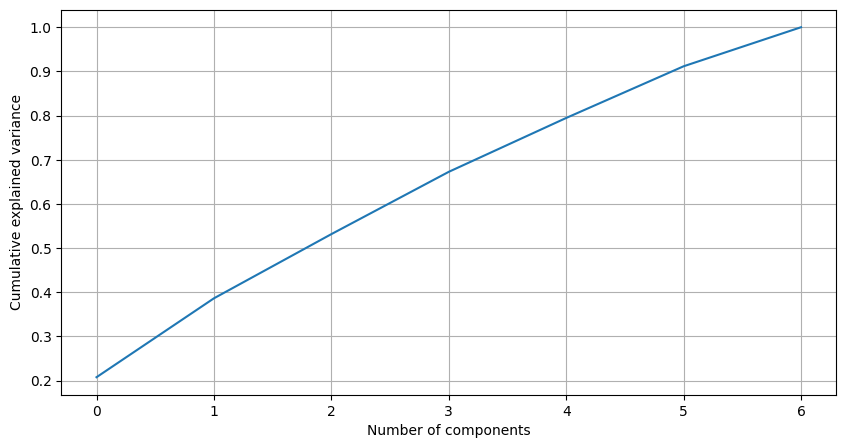

In [19]:
# Perfrom explained variance analysis for PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()




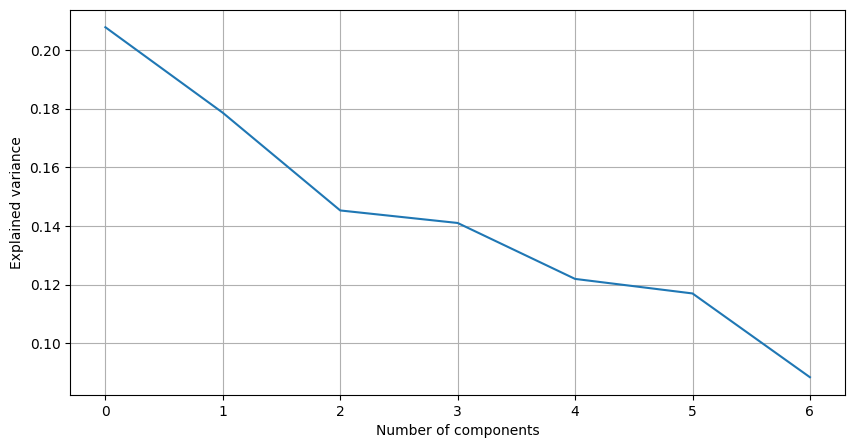

In [20]:
# Scree plot for PCA
plt.figure(figsize=(10, 5))
plt.plot(explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.grid()
plt.show()
